In [247]:
import pandas as pd
import numpy as np
import glob

import os

from sklearn.metrics import cohen_kappa_score

from scipy.stats import spearmanr, kendalltau

In [30]:
import re

In [143]:
import matplotlib.pyplot as plt

In [136]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 200)
pd.options.display.float_format = '{:,.6f}'.format

In [13]:
os.getcwd()

'/media/eduseiti/bigdata01/unicamp/ia368v_dd/trabalho_final'

In [3]:
ANNOTATIONS_FOLDER="anotações_humanas"

In [4]:
user_1 = [
    'anotações_humanas/admin_2nd_round.csv',
    'anotações_humanas/admin_2nd_queries_set.csv'
]

In [5]:
user_2 = [
    'anotações_humanas/Eduardo_2nd_round.csv',
    'anotações_humanas/Eduardo_2nd_queries_set.csv'
]

In [6]:
user_3 = [
    'anotações_humanas/Leodécio_2nd_round_recall.csv',
    'anotações_humanas/Leodécio_2nd_queries_set.csv'
]

In [7]:
gpt3 = [
    'anotações_humanas/gpt_3_evaluations_120_samples_2nd_round.tsv',
    'anotações_humanas/gpt_3_evaluations_120_samples_2nd_queries_set.tsv'
]

In [8]:
gpt4 = [
    'anotações_humanas/gpt_4_evaluations_120_samples_2nd_round.tsv',
    'anotações_humanas/gpt_4_evaluations_120_samples_2nd_queries_set.tsv'
]

In [9]:
def read_user_evaluations(files):
    
    user_evals = []
    
    for which_file in files:
        user_evals.append(pd.read_csv(which_file))
        
    return pd.concat(user_evals)

In [10]:
def read_gpt_evaluations(files):
    
    user_evals = []
    
    for which_file in files:
        user_evals.append(pd.read_csv(which_file, sep='\t'))
        
    return pd.concat(user_evals)

In [14]:
a1_df = read_user_evaluations(user_1)

In [15]:
classes_map = {
    'Perfect': 3,
    'Highly Relevant': 2,
    'Relevant': 1,
    'Irrelevant': 0
}

In [16]:
a1_df['score'] = a1_df['label'].map(classes_map)

In [17]:
a2_df = read_user_evaluations(user_2)
a3_df = read_user_evaluations(user_3)

In [18]:
a2_df['score'] = a2_df['label'].map(classes_map)
a3_df['score'] = a3_df['label'].map(classes_map)

## Check annotators agreement

In [19]:
print(cohen_kappa_score(a1_df['score'], a2_df['score']))
print(cohen_kappa_score(a1_df['score'], a3_df['score']))
print(cohen_kappa_score(a2_df['score'], a3_df['score']))

0.43688147563072066
0.42940239595595864
0.41045478546339453


## Check annotators correlation against LLM evaluations

### Start with GPT3.5 evaluations

In [20]:
gpt3_redux_df = read_gpt_evaluations(gpt3)

In [21]:
print(cohen_kappa_score(a1_df['score'], gpt3_redux_df['score'].to_numpy()))
print(cohen_kappa_score(a2_df['score'], gpt3_redux_df['score'].to_numpy()))
print(cohen_kappa_score(a3_df['score'], gpt3_redux_df['score'].to_numpy()))

0.17247048615075455
0.14738711870353716
0.20966609361001487


### Now the GPT4 evaluations

In [22]:
gpt4_redux_df = read_gpt_evaluations(gpt4)

In [23]:
print(cohen_kappa_score(a1_df['score'], gpt4_redux_df['score'].to_numpy()))
print(cohen_kappa_score(a2_df['score'], gpt4_redux_df['score'].to_numpy()))
print(cohen_kappa_score(a3_df['score'], gpt4_redux_df['score'].to_numpy()))

0.31813418411308547
0.2746090261717766
0.3551552533819303


In [24]:
gpt4_redux_df['cost'].sum()

7.098089999999992

In [25]:
gpt3_redux_df['cost'].sum()

0.49912949999999817

## Save the LLM evaluations along with the questions

In [33]:
data_split = []

for i, row in a1_df.iterrows():
    m = re.match("Query: \n(.+)\n\nPassage:\n(.+)", row['text'])
    
    data_split.append({
                       'doccano_id': row['id'],
                       'query': m.group(1),
                       'passage': m.group(2),
                       'passage_id': row['passage-id']
                       })

In [41]:
gpt4_redux_complete_df = pd.concat([pd.DataFrame(data_split), gpt4_redux_df.reset_index()], axis=1)

In [42]:
gpt3_redux_complete_df = pd.concat([pd.DataFrame(data_split), gpt3_redux_df.reset_index()], axis=1)

In [43]:
gpt4_redux_complete_df.to_csv(os.path.join(ANNOTATIONS_FOLDER, "gpt_4_evaluations_120_samples_2nd_round_with_questions.tsv"), sep='\t', index=False)

In [44]:
gpt3_redux_complete_df.to_csv(os.path.join(ANNOTATIONS_FOLDER, "gpt_3_evaluations_120_samples_2nd_round_with_questions.tsv"), sep='\t', index=False)

# Check agreement per question

In [51]:
a1_df = pd.concat([pd.DataFrame(data_split), a1_df.reset_index()[['label', 'score']]], axis=1)

In [52]:
a2_df = pd.concat([pd.DataFrame(data_split), a2_df.reset_index()[['label', 'score']]], axis=1)

In [53]:
a3_df = pd.concat([pd.DataFrame(data_split), a3_df.reset_index()[['label', 'score']]], axis=1)

In [54]:
a1_df.to_csv(os.path.join(ANNOTATIONS_FOLDER, "admin_240_annotations_with_questions.tsv"), sep='\t', index=False)
a2_df.to_csv(os.path.join(ANNOTATIONS_FOLDER, "Eduardo_240_annotations_with_questions.tsv"), sep='\t', index=False)
a3_df.to_csv(os.path.join(ANNOTATIONS_FOLDER, "Leodecio_240_annotations_with_questions.tsv"), sep='\t', index=False)

In [55]:
a1_df

,doccano_id,query,passage,passage_id,label,score
0,4101,Onde está localizada a Praça XV de Novembro?,"Praça XV (Rio de Janeiro) – Wikipédia, a enciclopédia livre [ocultar] 5 línguas Praça XV (Rio de Janeiro) Origem: Wikipédia, a enciclopédia livre. Coordenadas: 22° 54′ 10″ S, 43° 10′ 24″ W Nota: Este artigo é sobre a praça da cidade do Rio de Janeiro. Para praças de outros lugares, veja Praça XV de Novembro. Esta página cita fontes, mas estas não cobrem todo o conteúdo. Ajude a inserir referências. Conteúdo não verificável poderá ser removido .— Encontre fontes: Google (notícias, livros e acadêmico)(Maio de 2019) A praça e as edificações das imediações. Trecho do Elevado da Perimetral que passava sobre a praça, em 2011. A Praça XV, também conhecida como Praça XV de Novembro, Praça Quinze de Novembro ou Praça Quinze, é uma praça situada no bairro do Centro, na Zona Central da cidade do Rio de Janeiro. Além de estar localizada na Rua Primeiro de Março, a praça integra a Orla Conde, um passeio público que margeia a Baía de Guanabara . A praça, que existe desde o século XVI, foi reinaugurada no dia 29 de maio de 2016 após ser revitalizada.[1] A revitalização da praça foi feita durante a gestão do prefeito Eduardo Paes no âmbito do Porto Maravilha, uma operação urbana que visa revitalizar a Zona Portuária do Rio de Janeiro.",clueweb22-pt0001-14-16263_0,Perfect,3
1,4102,Onde está localizada a Praça XV de Novembro?,"Rua XV de Novembro, 818 Centro, Pomerode, Santa Catarina 89107-000 Brasil Tela cheia O melhor por perto Restaurantes 100 dentro de 5 km Tarthurel Pizzaria 317 56 m $$ - $$$ • Italiana • Pizza Restaurante Torten Paradies 1.409 0.5 km $$ - $$$ • Docerias • Alemã • Brasileira Mon Cheri Bistro @ Casa Romena 106 0.7 km $$ - $$$ • Mediterrânea • Saudável • Leste europeia Veja tudo Atrações 24 dentro de 10 km Praça Jorge Lacerda 58 0.1 km Pontos de interesse Parque Municipal de Eventos 25 0.3 km Centros de convenção Parque Educativo Vila Encantada 1.057 0.9 km Parques Veja tudo Contribua Faça uma avaliação Carregue uma foto Avaliações Mais recente 4.5 722 avaliações Excelente 379 Muito boa 266 Razoável 68 Ruim 9 Horrível 1 Thais Leme, SP 161 contribuições Parada obrigatória para fotos mar de 2022 Quando eu via as fotos achava que era bem maior. O portal é muito bonito e tem um centro e informações turísticas. Estava no período da Osterfest, então estava todo com a decoração de Páscoa. Feita em 29 de abril de 2022 Esta avaliação representa a opinião subjetiva de um membro do Tripadvisor, e não da TripAdvisor LLC. daninoguei São Paulo, SP 2.143 contribuições MUITAS PESSOAS PARA TIRAR FOTOS mar de 2022 Portal turístico da cidade, local de parada para fotos com a representação da arquitetura local.",clueweb22-pt0000-27-16948_2,Irrelevant,0
2,4103,Onde está localizada a Praça XV de Novembro?,"A praça recebeu esse nome por homenagear o dia 15 de novembro de 1889, marcado pela Proclamação da República do Brasil. Nesse dia, foi instaurada a república federativa presidencialista no Brasil, em substituição à monarquia constitucional parlamentarista em vigor desde 1822. Índice 1 História 1.1 Período colonial 1.2 Século XIX 1.3 Século XX 1.4 Século XXI 2 Esculturas e Monumentos 2.1 Chafariz do Mestre Valentim 2.2 Estátua Equestre de Dom João VI 2.3 Estátua Equestre do General Osório 2.4 Estátua do Almirante Negro 2.5 Piskate 3 Transportes 3.1 Modais de transporte público 3.2 Elevado da Perimetral 3.3 Mergulhão da Praça XV 4 Pontos de interesse 5 Feiras 5.1 Feira de Antiguidades 5.2 Feirarte 6 Ver também 7 Referências 7.1 Bibliografia 8 Ligações externas História Período colonial Chafariz do Mestre Valentim, situado no centro da praça. A Praça XV hoje está localizada na região conhecida, nos primórdios da ocupação das terras da cidade, como Praia da Piaçaba. O local já teve diversas denominações: Largo do Terreiro da Polé;[4]Largo do Carmo;[5]Praça do Carmo; Terreiro do Paço; e Largo do Paço. Do século XVI até meados da década de 1770, com a

In [57]:
a1_df.merge(a2_df, left_on='doccano_id', right_on='doccano_id')

,doccano_id,query_x,passage_x,passage_id_x,label_x,score_x,query_y,passage_y,passage_id_y,label_y,score_y
0,4101,Onde está localizada a Praça XV de Novembro?,"Praça XV (Rio de Janeiro) – Wikipédia, a enciclopédia livre [ocultar] 5 línguas Praça XV (Rio de Janeiro) Origem: Wikipédia, a enciclopédia livre. Coordenadas: 22° 54′ 10″ S, 43° 10′ 24″ W Nota: Este artigo é sobre a praça da cidade do Rio de Janeiro. Para praças de outros lugares, veja Praça XV de Novembro. Esta página cita fontes, mas estas não cobrem todo o conteúdo. Ajude a inserir referências. Conteúdo não verificável poderá ser removido .— Encontre fontes: Google (notícias, livros e acadêmico)(Maio de 2019) A praça e as edificações das imediações. Trecho do Elevado da Perimetral que passava sobre a praça, em 2011. A Praça XV, também conhecida como Praça XV de Novembro, Praça Quinze de Novembro ou Praça Quinze, é uma praça situada no bairro do Centro, na Zona Central da cidade do Rio de Janeiro. Além de estar localizada na Rua Primeiro de Março, a praça integra a Orla Conde, um passeio público que margeia a Baía de Guanabara . A praça, que existe desde o século XVI, foi reinaugurada no dia 29 de maio de 2016 após ser revitalizada.[1] A revitalização da praça foi feita durante a gestão do prefeito Eduardo Paes no âmbito do Porto Maravilha, uma operação urbana que visa revitalizar a Zona Portuária do Rio de Janeiro.",clueweb22-pt0001-14-16263_0,Perfect,3,Onde está localizada a Praça XV de Novembro?,"Praça XV (Rio de Janeiro) – Wikipédia, a enciclopédia livre [ocultar] 5 línguas Praça XV (Rio de Janeiro) Origem: Wikipédia, a enciclopédia livre. Coordenadas: 22° 54′ 10″ S, 43° 10′ 24″ W Nota: Este artigo é sobre a praça da cidade do Rio de Janeiro. Para praças de outros lugares, veja Praça XV de Novembro. Esta página cita fontes, mas estas não cobrem todo o conteúdo. Ajude a inserir referências. Conteúdo não verificável poderá ser removido .— Encontre fontes: Google (notícias, livros e acadêmico)(Maio de 2019) A praça e as edificações das imediações. Trecho do Elevado da Perimetral que passava sobre a praça, em 2011. A Praça XV, também conhecida como Praça XV de Novembro, Praça Quinze de Novembro ou Praça Quinze, é uma praça situada no bairro do Centro, na Zona Central da cidade do Rio de Janeiro. Além de estar localizada na Rua Primeiro de Março, a praça integra a Orla Conde, um passeio público que margeia a Baía de Guanabara . A praça, que existe desde o século XVI, foi reinaugurada no dia 29 de maio de 2016 após ser revitalizada.[1] A revitalização da praça foi feita durante a gestão do prefeito Eduardo Paes no âmbito do Porto Maravilha, uma operação urbana que visa revitalizar a Zona Portuária do Rio de Janeiro.",clueweb22-pt0001-14-16263_0,Perfect,3
1,4102,Onde está localizada a Praça XV de Novembro?,"Rua XV de Novembro, 818 Centro, Pomerode, Santa Catarina 89107-000 Brasil Tela cheia O melhor por perto Restaurantes 100 dentro de 5 km Tarthurel Pizzaria 317 56 m $$ - $$$ • Italiana • Pizza Restaurante Torten Paradies 1.409 0.5 km $$ - $$$ • Docerias • Alemã • Brasileira Mon Cheri Bistro @ Casa Romena 106 0.7 km $$ - $$$ • Mediterrânea • Saudável • Leste europeia Veja tudo Atrações 24 dentro de 10 km Praça Jorge Lacerda 58 0.1 km Pontos de interesse Parque Municipal de Eventos 25 0.3 km Centros de convenção Parque Educativo Vila Encantada 1.057 0.9 km Parques Veja tudo Contribua Faça uma avaliação Carregue uma foto Avaliações Mais recente 4.5 722 avaliações Excelente 379 Muito boa 266 Razoável 68 Ruim 9 Horrível 1 Thais Leme, SP 161 contribuições Parada obrigatória para fotos mar de 2022 Quando eu via as fotos achava que era bem maior. O portal é muito bonito e tem um centro e informações turísticas. Estava no período da Osterfest, então estava todo com a decoração de Páscoa. Feita em 29 de abril de 2022 Esta avaliação representa a opinião subjetiva de um membro do Tripadvisor, e não da TripAdvisor LLC. daninoguei São Paulo, SP 2.143 contribuições MUITAS PESSOAS PAR

In [96]:
def check_agreement_per_questions(evaluation_a, evaluation_b, prefix=None):
    merged_df = evaluation_a.merge(evaluation_b, left_on='doccano_id', right_on='doccano_id')[['query_x', 'passage_x', 'passage_id_x', 'score_x', 'score_y']]
    
    correlations = []
    
    for group_name, group_df in merged_df.groupby('query_x'):
        correlations.append({'query': group_name,
                             'cohen_kappa{}'.format(prefix): cohen_kappa_score(group_df['score_x'], group_df['score_y'])})
        
    return merged_df, pd.DataFrame(correlations).fillna(1.0)

In [69]:
res_a1_a2 = check_agreement_per_questions(a1_df, a2_df, "_a1_a2")
res_a1_a3 = check_agreement_per_questions(a1_df, a3_df, "_a1_a3")
res_a2_a3 = check_agreement_per_questions(a2_df, a3_df, "_a2_a3")

In [83]:
res_a1_gpt3 = check_agreement_per_questions(a1_df, gpt3_redux_complete_df, "_a1_gpt3")
res_a1_gpt4 = check_agreement_per_questions(a1_df, gpt4_redux_complete_df, "_a1_gpt4")

In [84]:
res_a2_gpt3 = check_agreement_per_questions(a2_df, gpt3_redux_complete_df, "_a2_gpt3")
res_a2_gpt4 = check_agreement_per_questions(a2_df, gpt4_redux_complete_df, "_a2_gpt4")

In [97]:
res_a3_gpt3 = check_agreement_per_questions(a3_df, gpt3_redux_complete_df, "_a3_gpt3")

/home/eduseiti/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:697: RuntimeWarning: invalid value encountered in scalar divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


In [87]:
res_a3_gpt4 = check_agreement_per_questions(a3_df, gpt4_redux_complete_df, "_a3_gpt4")

In [99]:
res_gpt3_gpt4 = check_agreement_per_questions(gpt3_redux_complete_df, gpt4_redux_complete_df, "_gpt3_gpt4")

/home/eduseiti/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:697: RuntimeWarning: invalid value encountered in scalar divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)
/home/eduseiti/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:697: RuntimeWarning: invalid value encountered in scalar divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


In [101]:
res_gpt3_gpt4[1]

,query,cohen_kappa_gpt3_gpt4
0,Como o Brasil reagiu a epidemia de AIDS no fim do século XX?,0.333333
1,Como podemos classificar o relevo brasileiro?,0.230769
2,Como transformar uma cidade pacata em um polo turístico?,0.113924
3,Existem vantagens ao definir uma moeda única?,0.189189
4,No que se difere o civismo da cidadania?,-0.029412
5,"O que são os celulares ""mid-range""?",0.500000
6,Onde está localizada a Praça XV de Novembro?,0.189189
7,Por que a legislação de um país é tão importante?,0.090909
8,Por que os países Guiana e Suriname não são filiados a Conmebol?,0.090909
9,Quais as causas para lábios inflamados em crianças?,0.122807


In [119]:
res_gpt3_gpt4[1]['cohen_kappa_gpt3_gpt4'].mean(axis=0)

0.3124341846124043

In [120]:
res_gpt3_gpt4[1]['cohen_kappa_gpt3_gpt4'].std(axis=0)

0.27024327846973817

In [122]:
res_gpt3_gpt4[0][res_gpt3_gpt4[0]['query_x'] == 'Quando é o dia Mundial da Alimentação?']

,query_x,passage_x,passage_id_x,score_x,score_y
120,Quando é o dia Mundial da Alimentação?,"Dia Mundial da Alimentação Saudável: 16 de outubro - Toda Matéria Datas Comemorativas Dia Mundial da Alimentação Márcia Fernandes Professora licenciada em Letras O Dia Mundial da Alimentação é comemorado no dia 16 de outubro em diversas partes do mundo. A data foi implementada para alertar sobre a importância alimentação saudável, acessível e de qualidade, chamada de “Segurança Alimentar e Nutricional”. Também foca nos problemas sociais associados a ela, por exemplo, a fome, a desnutrição, a pobreza, dentre outros. Segundo a Constituição e a Declaração Universal dos Direitos Humanos, todos os seres humanos têm direito à alimentação. Porém, sabemos que muitos ainda passam fome e sofrem com carências nutricionais. Esse problema tem gerado um grande impacto na saúde de milhares de pessoas. Os dados do IBGE, estimam que no Brasil cerca de 7 milhões de pessoas convivem com a “insegurança alimentar grave”. No mundo, seriam 805 milhões de pessoas em estado de subnutrição. Origem da Data A data foi criada para assinalar a fundação da “Organização das Nações Unidas para a Agricultura e Alimentação” (FAO- Food and Agriculture Organization ), fundada em 1945.",clueweb22-pt0002-06-02352_0,3,3
121,Quando é o dia Mundial da Alimentação?,"Dia Mundial da Alimentação – Wikipédia, a enciclopédia livre [ocultar] 44 línguas Dia Mundial da Alimentação Origem: Wikipédia, a enciclopédia livre. Dia Mundial da Alimentação Uma imagem produzida como parte da campanha de mídia social do Programa Alimentar Mundial para o Dia Mundial da Alimentação em 2015 Tipo Internacional Data 16 de outubro Frequência Anual Dia Mundial da Alimentação é comemorado todo dia 16 de outubro, e teve início em 1981. É atualmente celebrada em mais de 150 países como uma importante data para consciencializar a opinião pública sobre questões relativas à nutrição e à alimentação. Esta data corresponde também à fundação da FAO (Food and Agriculture Organization ), Organização das Nações Unidas para Alimentação e Agricultura . Temas Desde 1981, o Dia Mundial da Alimentação adotou um tema diferente a cada ano para destacar as áreas necessárias para a ação e fornecer um foco comum. A maioria dos temas gira em torno da agricultura porque apenas os investimentos na agricultura - juntamente com o apoio à educação e à saúde - poderão conduzir à erradicação da fome e da má nutrição. Os temas abordados até agora foram: 1981: A comida vem primeiro. 1982: A comida vem primeiro. 1983: Segurança alimentar. 1984: Mulheres na agricultura. 1985: Pobreza rural.",clueweb22-pt0000-37-15887_0,3,3
122,Quando é o dia Mundial da Alimentação?,"Dia Mundial da Alimentação HOME › Calendário Outubro 2022 › Dia Mundial da Alimentação Calendário 2022 Dia Mundial da Alimentação próximos anos Tweet 16 Outubro de 2021 ( Sábado ) - Dia Mundial da Alimentação 16 Outubro de 2022 ( Domingo ) - Dia Mundial da Alimentação 16 Outubro de 2023 ( Segunda-feira ) - Dia Mundial da Alimentação 16 Outubro de 2024 ( Quarta-feira ) - Dia Mundial da Alimentação 16 Outubro de 2025 ( Quinta-feira ) - Dia Mundial da Alimentação O Dia Mundial da Alimentação começou a ser celebrado em 1981, como uma forma de conscientizar a população de que é preciso se manter informado em questões como nutrição e alimentação para manter a saúde em dia. Esta data é marcada também pela criação da Organização das Nações Unidas para a Alimentação e Agricultura. Durante os últimos anos, eventos realizados neste dia apresentaram temas relacionados à alimentação. O Dia Mundial da Alimentação é comemorado em 16 de outubro em mais de 150 países ao redor do planeta. Imagens para Compartilhar no Facebook Foto: ShutterStock ou envie para seus amigos do Face -> Foto: ShutterStock ou envie para seus amigos do Face -> Outras Datas Comemorativas 29 Outubro - Dia de São Narciso 16 Setembro - Dia de São Cipriano 5",clueweb22-pt0000-11-08642_0,3,3
123,Quando é o dia Mundial da Al

In [223]:
res_a2_gpt4[0][res_a2_gpt4[0]['query_x'] == 'Quando é o dia Mundial da Alimentação?'][['score_x', 'score_y']]

,score_x,score_y
120,3,3
121,3,3
122,3,3
123,3,3
124,3,3
125,2,3
126,2,3
127,2,3
128,1,3
129,2,3


In [249]:
v2 = res_a2_gpt4[0][res_a2_gpt4[0]['query_x'] == 'Quando é o dia Mundial da Alimentação?'][['score_x', 'score_y']].to_numpy()

In [250]:
v2

array([[3, 3],
       [3, 3],
       [3, 3],
       [3, 3],
       [3, 3],
       [2, 3],
       [2, 3],
       [2, 3],
       [1, 3],
       [2, 3]])

In [252]:
v2[0, 1] = 1

In [240]:
v2[9, 1] = 2

In [241]:
v2[:,0]

array([3, 3, 3, 3, 3, 2, 2, 2, 1, 2])

In [245]:
v2[:, 1]

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 2])

In [246]:
cohen_kappa_score(v2[:,1], v2[:, 0])

0.21568627450980382

In [253]:
kendalltau(v2[:,1], v2[:, 0])

SignificanceResult(statistic=-0.3094922302950865, pvalue=0.3359238131517357)

In [224]:
res_a1_gpt4[0][res_a1_gpt4[0]['query_x'] == 'Quando é o dia Mundial da Alimentação?'][['score_x', 'score_y']]

,score_x,score_y
120,3,3
121,3,3
122,3,3
123,2,3
124,3,3
125,3,3
126,3,3
127,2,3
128,1,3
129,2,3


In [225]:
res_a3_gpt4[0][res_a3_gpt4[0]['query_x'] == 'Quando é o dia Mundial da Alimentação?'][['score_x', 'score_y']]

,score_x,score_y
120,3,3
121,3,3
122,3,3
123,3,3
124,3,3
125,2,3
126,3,3
127,3,3
128,2,3
129,3,3


In [71]:
combined_res = pd.concat([res_a1_a2[1], res_a1_a3[1]['cohen_kappa_a1_a3'], res_a2_a3[1]['cohen_kappa_a2_a3']], axis=1)

In [74]:
combined_res.columns

Index(['query', 'cohen_kappa_a1_a2', 'cohen_kappa_a1_a3', 'cohen_kappa_a2_a3'], dtype='object')

In [148]:
combined_res['cohen_kappa_median'] = combined_res[['cohen_kappa_a1_a2', 'cohen_kappa_a1_a3', 'cohen_kappa_a2_a3']].median(axis=1)

In [77]:
combined_res['cohen_kappa_mean'] = combined_res[['cohen_kappa_a1_a2', 'cohen_kappa_a1_a3', 'cohen_kappa_a2_a3']].mean(axis=1)

In [78]:
combined_res['cohen_kappa_std'] = combined_res[['cohen_kappa_a1_a2', 'cohen_kappa_a1_a3', 'cohen_kappa_a2_a3']].std(axis=1)

In [149]:
combined_res

,query,cohen_kappa_a1_a2,cohen_kappa_a1_a3,cohen_kappa_a2_a3,cohen_kappa_mean,cohen_kappa_std,cohen_kappa_median
0,Como o Brasil reagiu a epidemia de AIDS no fim do século XX?,0.516129,0.264706,0.428571,0.403135,0.127627,0.428571
1,Como podemos classificar o relevo brasileiro?,0.375000,0.516129,0.264706,0.385278,0.126026,0.375000
2,Como transformar uma cidade pacata em um polo turístico?,0.285714,0.473684,0.583333,0.447577,0.150517,0.473684
3,Existem vantagens ao definir uma moeda única?,0.722222,0.305556,0.305556,0.444444,0.240563,0.305556
4,No que se difere o civismo da cidadania?,0.156627,0.166667,0.375000,0.232764,0.123282,0.166667
5,"O que são os celulares ""mid-range""?",0.508197,0.687500,0.253731,0.483143,0.217967,0.508197
6,Onde está localizada a Praça XV de Novembro?,0.264706,0.305556,0.696970,0.422410,0.238651,0.305556
7,Por que a legislação de um país é tão importante?,0.166667,0.508197,0.166667,0.280510,0.197182,0.166667
8,Por que os países Guiana e Suriname não são filiados a Conmebol?,0.836066,0.677419,0.843750,0.785745,0.093891,0.836066
9,Quais as causas para lábios inflamados em crianças?,0.180328,-0.038961,-0.212121,-0.023585,0.196676,-0.038961


In [216]:
human_stats = pd.DataFrame()

In [217]:
human_stats['mean all questions'] = combined_res[['cohen_kappa_a1_a2', 'cohen_kappa_a1_a3', 'cohen_kappa_a2_a3']].mean(axis=0)

In [218]:
human_stats['std all questions'] = combined_res[['cohen_kappa_a1_a2', 'cohen_kappa_a1_a3', 'cohen_kappa_a2_a3']].std(axis=0)

In [219]:
human_stats

,mean all questions,std all questions
cohen_kappa_a1_a2,0.336280,0.284946
cohen_kappa_a1_a3,0.322326,0.282682
cohen_kappa_a2_a3,0.309986,0.262268


In [207]:
def plot_correlation_data_consolidated(correlation_df, columns_to_plot, plot_title):
    
    fig = plt.figure(figsize=[10, 10])

    fig.suptitle(plot_title, y=0.91)

    plt.grid()

    all_boxplots = plt.boxplot(correlation_df[columns_to_plot], patch_artist=True, vert=False, meanline=True, showmeans=True)

    colors = ['pink', 'lightblue', 'lightgreen']
    
    all_boxes = all_boxplots['boxes']
    
    print(all_boxes)
    
    for i, which_box in enumerate(all_boxes):
        which_box.set_facecolor(colors[i // 3])
    
    
    plt.yticks(range(1, len(columns_to_plot) + 1), columns_to_plot)
    plt.xticks(np.arange(-0.3, 1.0, 0.1))
    
    plt.legend(handles=all_boxes[::3], labels=["Humanos x Humanos", "Humanos x GPT3.5", "Humanos x GPT4"], bbox_to_anchor=(1.0, 1.0))

    plt.show()

In [195]:
def plot_correlation_data(correlation_df, columns_to_plot, plot_title):
    
    fig = plt.figure(figsize=[15, 15])

    fig.suptitle(plot_title, y=0.91)

    plt.grid()

    plt.boxplot(correlation_df[columns_to_plot].to_numpy().transpose(), vert=False, meanline=True, showmeans=True)

    plt.yticks(range(1, correlation_df.shape[0] + 1), correlation_df['query'])
    plt.xticks(np.arange(-0.3, 1.0, 0.1))

    plt.show()

[<matplotlib.patches.PathPatch object at 0x7ffa624129b0>, <matplotlib.patches.PathPatch object at 0x7ffa624135e0>, <matplotlib.patches.PathPatch object at 0x7ffa62410730>, <matplotlib.patches.PathPatch object at 0x7ffa6206bdf0>, <matplotlib.patches.PathPatch object at 0x7ffa6206a290>, <matplotlib.patches.PathPatch object at 0x7ffa6206be80>, <matplotlib.patches.PathPatch object at 0x7ffa6244a500>, <matplotlib.patches.PathPatch object at 0x7ffa6244b0d0>, <matplotlib.patches.PathPatch object at 0x7ffa62449bd0>]


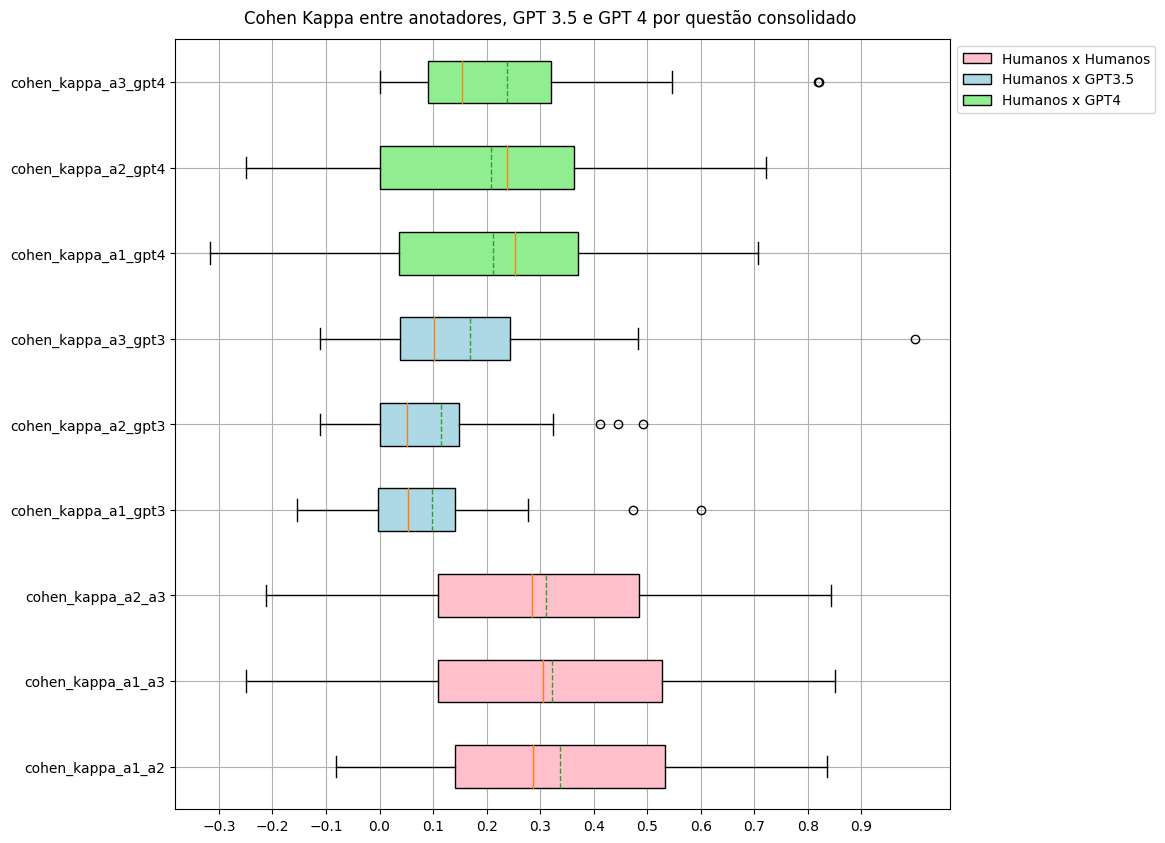

In [209]:
plot_correlation_data_consolidated(all_df, all_df.columns[1:10], "Cohen Kappa entre anotadores, GPT 3.5 e GPT 4 por questão consolidado")

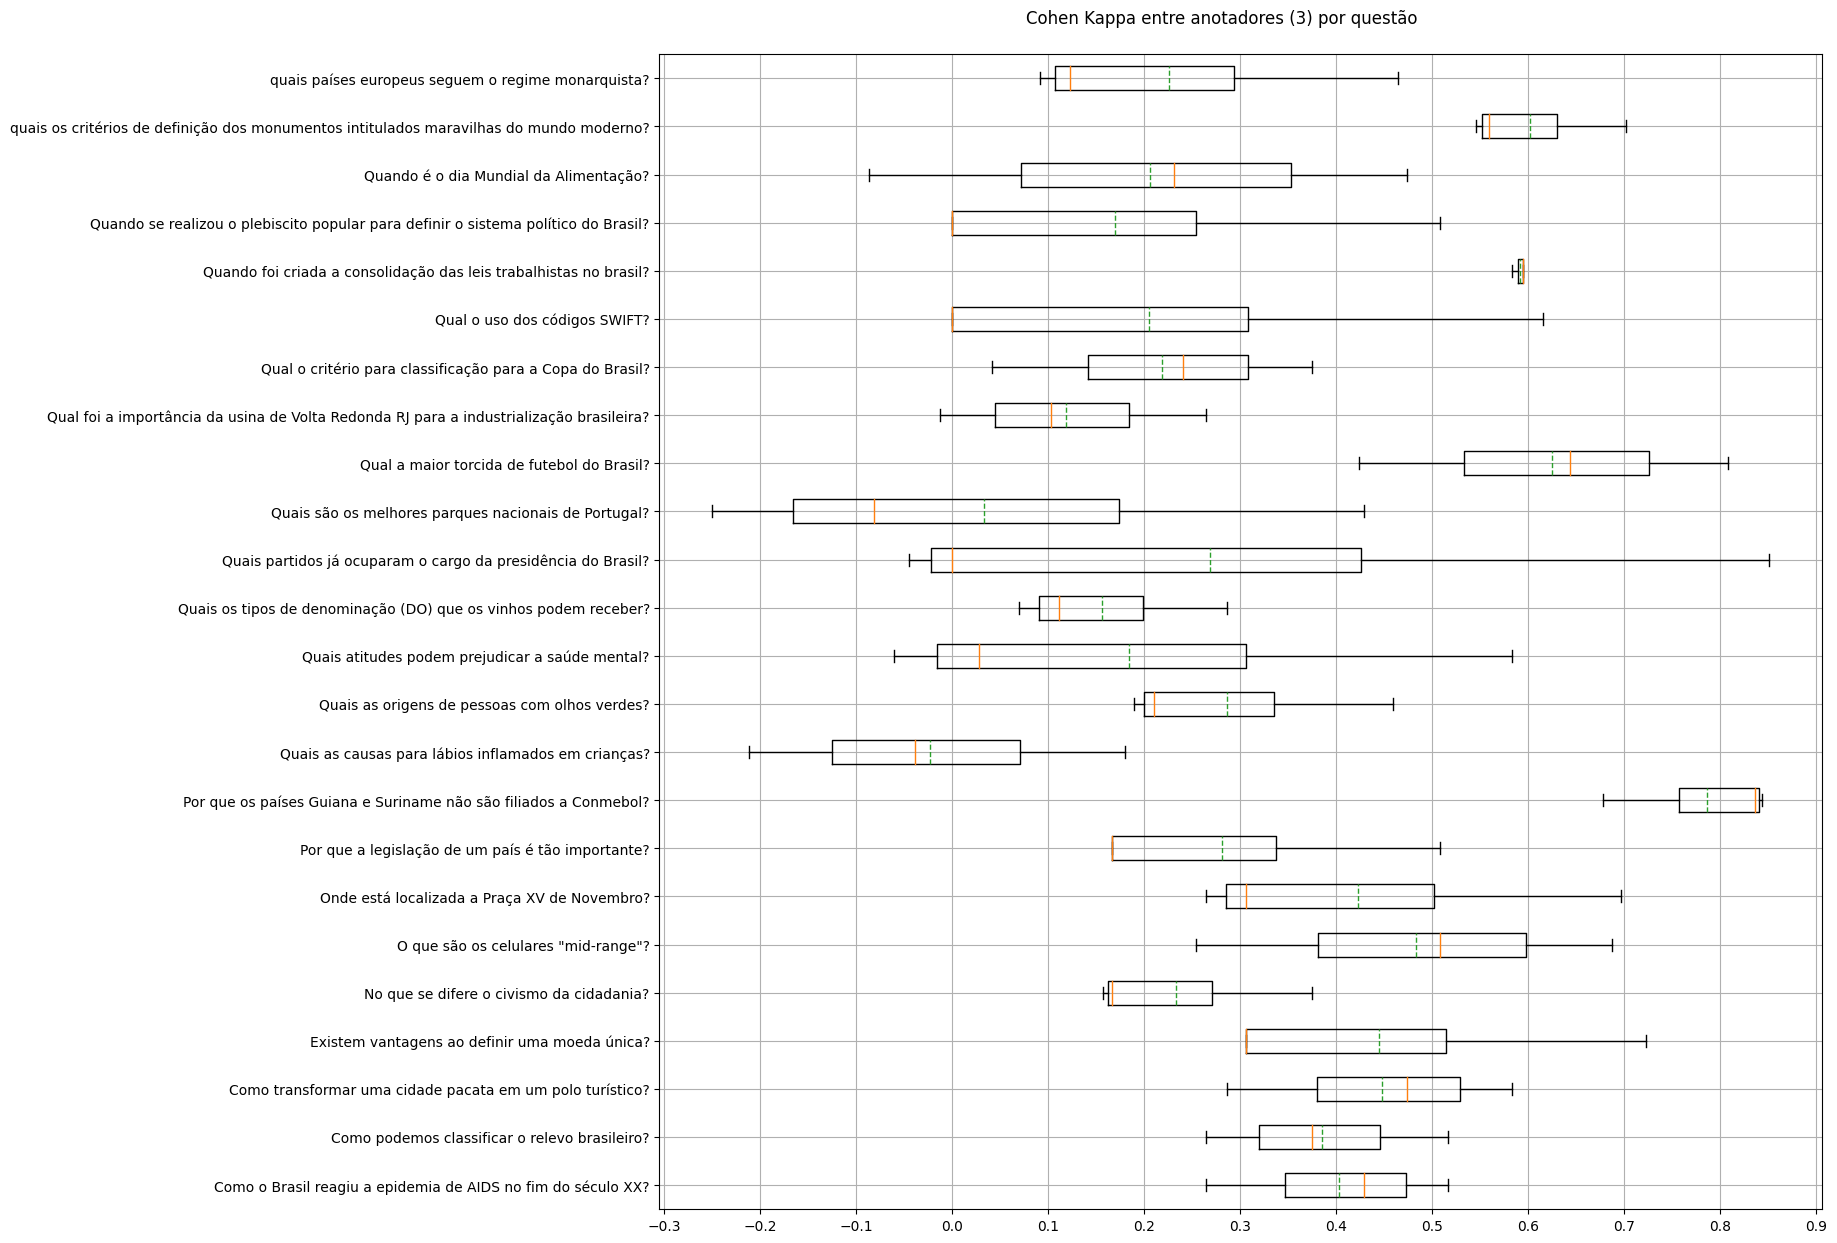

In [196]:
plot_correlation_data(combined_res, ['cohen_kappa_a1_a2', 'cohen_kappa_a1_a3', 'cohen_kappa_a2_a3'], "Cohen Kappa entre anotadores (3) por questão")

In [105]:
combined_res_gpt3 = pd.concat([res_a1_gpt3[1], res_a2_gpt3[1]['cohen_kappa_a2_gpt3'], res_a3_gpt3[1]['cohen_kappa_a3_gpt3']], axis=1)

In [107]:
combined_res_gpt3['cohen_kappa_mean'] = combined_res_gpt3[['cohen_kappa_a1_gpt3', 'cohen_kappa_a2_gpt3', 'cohen_kappa_a3_gpt3']].mean(axis=1)
combined_res_gpt3['cohen_kappa_std'] = combined_res_gpt3[['cohen_kappa_a1_gpt3', 'cohen_kappa_a2_gpt3', 'cohen_kappa_a3_gpt3']].std(axis=1)

In [137]:
combined_res_gpt3

,query,cohen_kappa_a1_gpt3,cohen_kappa_a2_gpt3,cohen_kappa_a3_gpt3,cohen_kappa_mean,cohen_kappa_std
0,Como o Brasil reagiu a epidemia de AIDS no fim do século XX?,0.277108,0.411765,0.102564,0.263812,0.155029
1,Como podemos classificar o relevo brasileiro?,0.117647,0.047619,0.230769,0.132012,0.092416
2,Como transformar uma cidade pacata em um polo turístico?,0.090909,0.324324,0.324324,0.246519,0.134762
3,Existem vantagens ao definir uma moeda única?,0.054054,0.054054,0.090909,0.066339,0.021278
4,No que se difere o civismo da cidadania?,0.014085,0.024390,0.166667,0.068380,0.085274
5,"O que são os celulares ""mid-range""?",0.275362,0.444444,0.365079,0.361629,0.084594
6,Onde está localizada a Praça XV de Novembro?,-0.014493,0.058824,0.080460,0.041597,0.049765
7,Por que a legislação de um país é tão importante?,0.069767,0.021739,0.090909,0.060805,0.035445
8,Por que os países Guiana e Suriname não são filiados a Conmebol?,0.473684,0.491525,0.482759,0.482656,0.008921
9,Quais as causas para lábios inflamados em crianças?,0.135802,0.090909,0.285714,0.170809,0.102011


In [141]:
combined_res_gpt3[combined_res_gpt3.columns[1:5]].mean(axis=0)

cohen_kappa_a1_gpt3   0.097618
cohen_kappa_a2_gpt3   0.114282
cohen_kappa_a3_gpt3   0.168936
cohen_kappa_mean      0.126946
dtype: float64

In [142]:
combined_res_gpt3[combined_res_gpt3.columns[1:5]].std(axis=0)

cohen_kappa_a1_gpt3   0.175348
cohen_kappa_a2_gpt3   0.170059
cohen_kappa_a3_gpt3   0.227328
cohen_kappa_mean      0.138572
dtype: float64

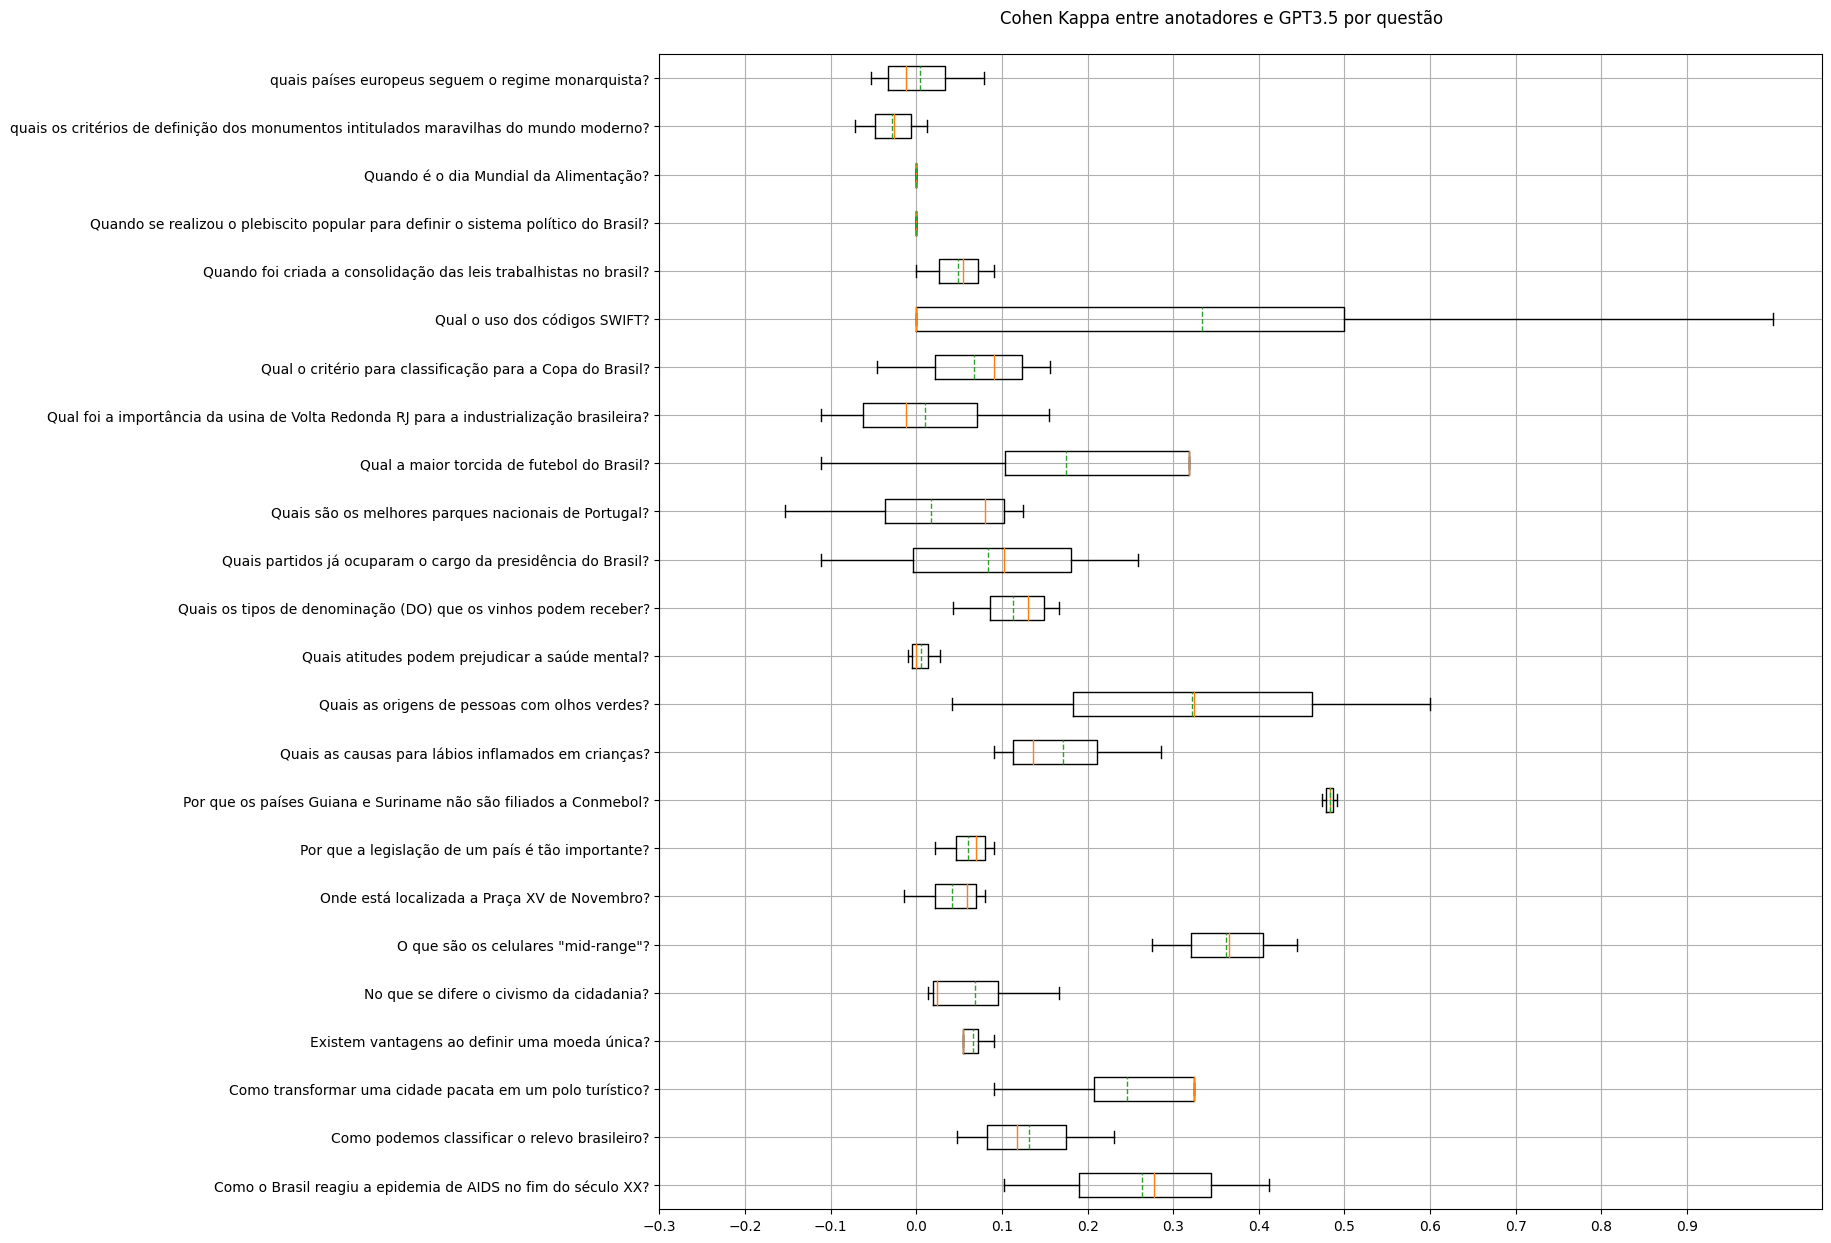

In [176]:
plot_correlation_data(combined_res_gpt3, combined_res_gpt3.columns[1:4], "Cohen Kappa entre anotadores e GPT3.5 por questão")

In [115]:
combined_res_gpt4 = pd.concat([res_a1_gpt4[1], res_a2_gpt4[1]['cohen_kappa_a2_gpt4'], res_a3_gpt4[1]['cohen_kappa_a3_gpt4']], axis=1)
combined_res_gpt4['cohen_kappa_mean'] = combined_res_gpt4[['cohen_kappa_a1_gpt4', 'cohen_kappa_a2_gpt4', 'cohen_kappa_a3_gpt4']].mean(axis=1)
combined_res_gpt4['cohen_kappa_std'] = combined_res_gpt4[['cohen_kappa_a1_gpt4', 'cohen_kappa_a2_gpt4', 'cohen_kappa_a3_gpt4']].std(axis=1)

In [138]:
combined_res_gpt4

,query,cohen_kappa_a1_gpt4,cohen_kappa_a2_gpt4,cohen_kappa_a3_gpt4,cohen_kappa_mean,cohen_kappa_std
0,Como o Brasil reagiu a epidemia de AIDS no fim do século XX?,0.253731,0.014085,0.166667,0.144828,0.121307
1,Como podemos classificar o relevo brasileiro?,-0.000000,-0.250000,0.423077,0.057692,0.340227
2,Como transformar uma cidade pacata em um polo turístico?,0.076923,0.342105,0.102564,0.173864,0.146264
3,Existem vantagens ao definir uma moeda única?,0.444444,0.722222,0.295775,0.487480,0.216457
4,No que se difere o civismo da cidadania?,0.705882,0.090909,0.111111,0.302634,0.349369
5,"O que são os celulares ""mid-range""?",0.538462,0.428571,0.818182,0.595072,0.200880
6,Onde está localizada a Praça XV de Novembro?,0.259259,0.220779,0.253731,0.244590,0.020805
7,Por que a legislação de um país é tão importante?,0.253731,-0.022727,0.054054,0.095019,0.142709
8,Por que os países Guiana e Suriname não são filiados a Conmebol?,0.275362,0.264706,0.393939,0.311336,0.071735
9,Quais as causas para lábios inflamados em crianças?,-0.184211,-0.147541,0.130435,-0.067106,0.172055


In [139]:
combined_res_gpt4[combined_res_gpt4.columns[1:5]].mean(axis=0)

cohen_kappa_a1_gpt4   0.212724
cohen_kappa_a2_gpt4   0.207566
cohen_kappa_a3_gpt4   0.237661
cohen_kappa_mean      0.219317
dtype: float64

In [140]:
combined_res_gpt4[combined_res_gpt4.columns[1:5]].std(axis=0)

cohen_kappa_a1_gpt4   0.236458
cohen_kappa_a2_gpt4   0.258406
cohen_kappa_a3_gpt4   0.237791
cohen_kappa_mean      0.178143
dtype: float64

In [220]:
human_gpt4_stats = pd.DataFrame()

In [221]:
human_gpt4_stats['mean all questions'] = combined_res_gpt4[combined_res_gpt4.columns[1:4]].mean(axis=0)

human_gpt4_stats['std all questions'] = combined_res_gpt4[combined_res_gpt4.columns[1:4]].std(axis=0)

In [222]:
human_gpt4_stats

,mean all questions,std all questions
cohen_kappa_a1_gpt4,0.212724,0.236458
cohen_kappa_a2_gpt4,0.207566,0.258406
cohen_kappa_a3_gpt4,0.237661,0.237791


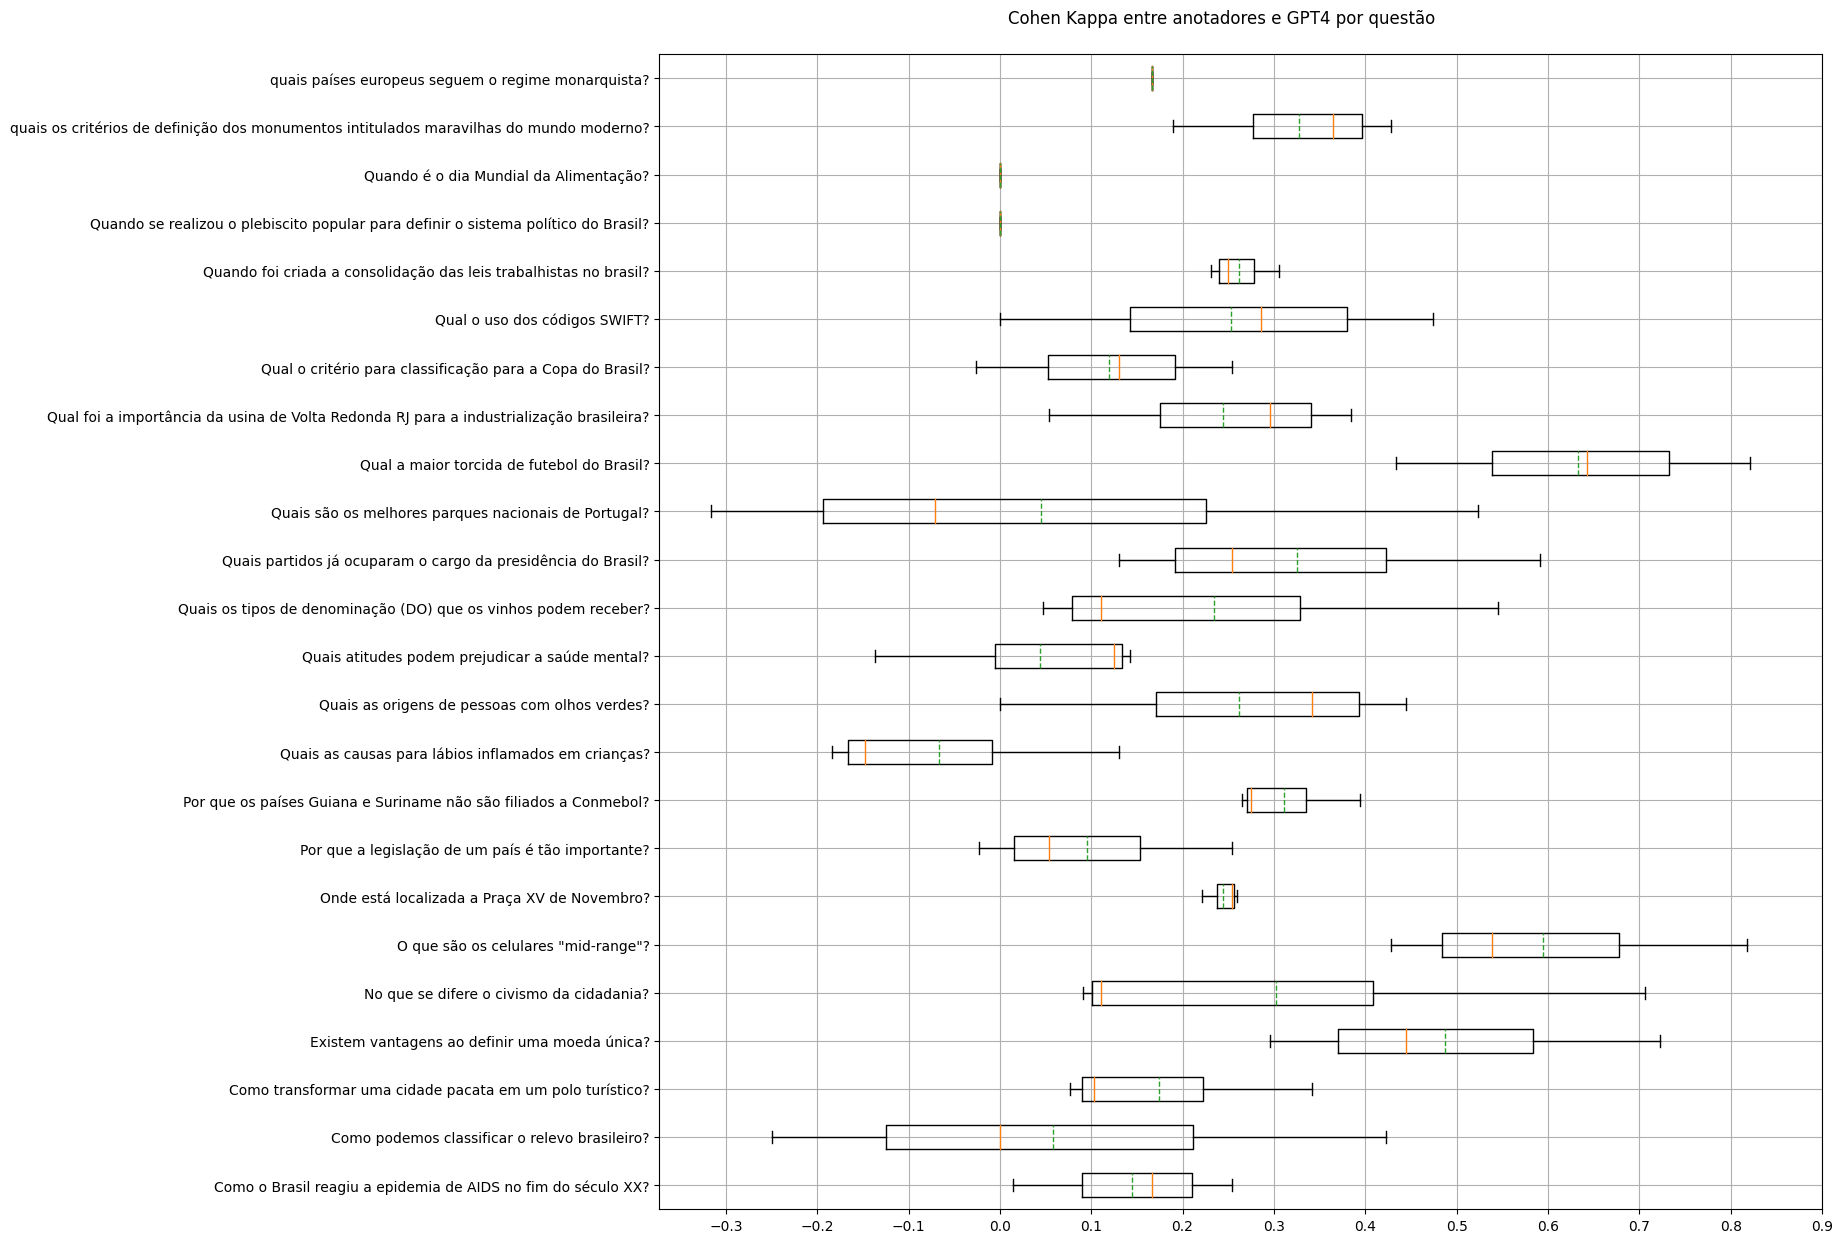

In [177]:
plot_correlation_data(combined_res_gpt4, combined_res_gpt4.columns[1:4], "Cohen Kappa entre anotadores e GPT4 por questão")

In [182]:
combined_res.columns[:-3]

Index(['query', 'cohen_kappa_a1_a2', 'cohen_kappa_a1_a3', 'cohen_kappa_a2_a3'], dtype='object')

In [185]:
all_df = pd.concat([combined_res[combined_res.columns[:-3]], combined_res_gpt3.iloc[:, 1:4], combined_res_gpt4.iloc[:, 1:4]], axis=1)

In [186]:
all_df

,query,cohen_kappa_a1_a2,cohen_kappa_a1_a3,cohen_kappa_a2_a3,cohen_kappa_a1_gpt3,cohen_kappa_a2_gpt3,cohen_kappa_a3_gpt3,cohen_kappa_a1_gpt4,cohen_kappa_a2_gpt4,cohen_kappa_a3_gpt4
0,Como o Brasil reagiu a epidemia de AIDS no fim do século XX?,0.516129,0.264706,0.428571,0.277108,0.411765,0.102564,0.253731,0.014085,0.166667
1,Como podemos classificar o relevo brasileiro?,0.375000,0.516129,0.264706,0.117647,0.047619,0.230769,-0.000000,-0.250000,0.423077
2,Como transformar uma cidade pacata em um polo turístico?,0.285714,0.473684,0.583333,0.090909,0.324324,0.324324,0.076923,0.342105,0.102564
3,Existem vantagens ao definir uma moeda única?,0.722222,0.305556,0.305556,0.054054,0.054054,0.090909,0.444444,0.722222,0.295775
4,No que se difere o civismo da cidadania?,0.156627,0.166667,0.375000,0.014085,0.024390,0.166667,0.705882,0.090909,0.111111
5,"O que são os celulares ""mid-range""?",0.508197,0.687500,0.253731,0.275362,0.444444,0.365079,0.538462,0.428571,0.818182
6,Onde está localizada a Praça XV de Novembro?,0.264706,0.305556,0.696970,-0.014493,0.058824,0.080460,0.259259,0.220779,0.253731
7,Por que a legislação de um país é tão importante?,0.166667,0.508197,0.166667,0.069767,0.021739,0.090909,0.253731,-0.022727,0.054054
8,Por que os países Guiana e Suriname não são filiados a Conmebol?,0.836066,0.677419,0.843750,0.473684,0.491525,0.482759,0.275362,0.264706,0.393939
9,Quais as causas para lábios inflamados em crianças?,0.180328,-0.038961,-0.212121,0.135802,0.090909,0.285714,-0.184211,-0.147541,0.130435
